In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os.path as osp
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

/usr/local/lib/python3.5/dist-packages/pycocotools/coco.py:49: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platfo

In [6]:
imgDir='handai_dataset_img'
annFile='handai_annotations.json'

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [7]:
class_ids = None

In [11]:
if not class_ids:
    # All classes
    class_ids = sorted(coco.getCatIds())

# All images or a subset?
if class_ids:
    image_ids = []
    for id in class_ids:
        image_ids.extend(list(coco.getImgIds(catIds=[id])))
    # Remove duplicates
    image_ids = list(set(image_ids))
else:
    # All images
    image_ids = list(coco.imgs.keys())

In [12]:
class_ids

[1, 2, 3, 4, 5, 6, 7]

In [14]:
image_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [19]:
for i in class_ids:
    print(coco.loadCats(i)[0]["name"])

block1
block2
block3
block4
block5
block6
block7


In [21]:
coco.imgs[i]["width"]

1024

In [22]:
coco.imgs[i]["height"]

680

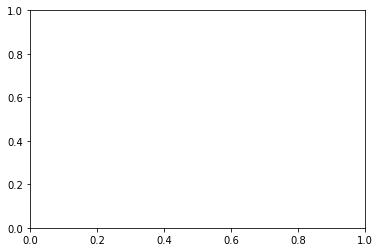

In [28]:
for i in image_ids:
    ant = coco.loadAnns(coco.getAnnIds(imgIds=[i], catIds=class_ids, iscrowd=None))
    coco.showAnns(ant)

In [27]:
ant

[{'bbox': [377.0, 338.0, 104.0, 110.0],
  'category_id': 5,
  'id': 503,
  'image_id': 200,
  'iscrowd': 0,
  'segmentation': [[377.0,
    355.0,
    377.0,
    355.0,
    390.0,
    448.0,
    438.0,
    445.0,
    433.0,
    395.0,
    481.0,
    392.0,
    474.0,
    338.0]]},
 {'bbox': [445.0, 343.0, 100.0, 152.0],
  'category_id': 7,
  'id': 504,
  'image_id': 200,
  'iscrowd': 0,
  'segmentation': [[537.0,
    343.0,
    538.0,
    344.0,
    545.0,
    493.0,
    499.0,
    495.0,
    494.0,
    485.0,
    493.0,
    445.0,
    445.0,
    443.0,
    445.0,
    397.0,
    492.0,
    395.0,
    490.0,
    344.0]]},
 {'bbox': [394.0, 443.0, 99.0, 61.0],
  'category_id': 4,
  'id': 505,
  'image_id': 200,
  'iscrowd': 0,
  'segmentation': [[394.0,
    457.0,
    394.0,
    457.0,
    397.0,
    504.0,
    493.0,
    495.0,
    492.0,
    443.0]]},
 {'bbox': [380.0, 447.0, 15.0, 48.0],
  'category_id': 1,
  'id': 506,
  'image_id': 200,
  'iscrowd': 0,
  'segmentation': [[380.0,
    

In [ ]:
# Add classes
for i in class_ids:
    self.add_class("coco", i, coco.loadCats(i)[0]["name"])

# Add images
for i in image_ids:
    self.add_image(
        "coco", image_id=i,
        path=os.path.join(image_dir, coco.imgs[i]['file_name']),
        width=coco.imgs[i]["width"],
        height=coco.imgs[i]["height"],
        annotations=coco.loadAnns(coco.getAnnIds(
            imgIds=[i], catIds=class_ids, iscrowd=None)))
if return_coco:
    return coco